# Import Required Libraries

In [1]:
import seaborn as sns # for heatmap plotting
import pandas as pd    # Data handling
import matplotlib.pyplot as plt   # Visualization
import warnings         # Suppress warnings
warnings.filterwarnings('ignore')  # Hide warnings for clean output

### Load Cleaned Datasets

In [2]:
df1 = pd.read_csv('cleaned_jumia_iphone.csv')   # Load cleaned Jumia iPhone data
df2 = pd.read_csv('cleaned_konga_iphone.csv')   # Load cleaned Konga iPhone data

### Create Easy-to-Reference Variables

In [3]:
jumia = df1   # Assign Jumia dataset to a shorter variable name
konga = df2   # Assign Konga dataset to a shorter variable name

### 1. Visualize iPhone Price Distribution with Boxplot
Show how prices spread and which store has wider variation.

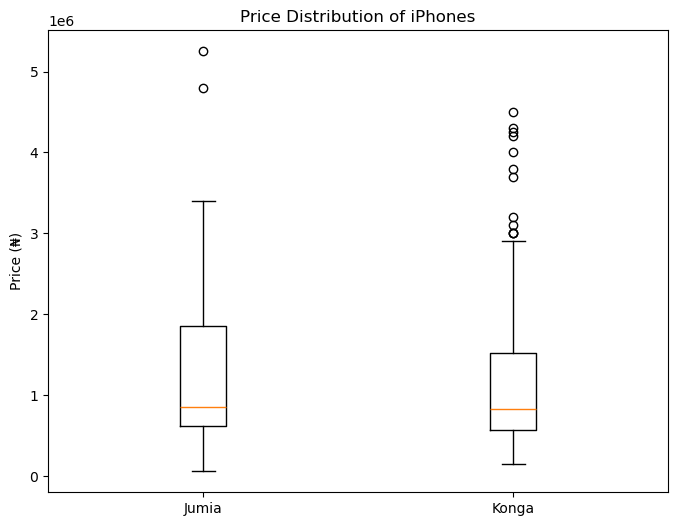

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))  # Set figure size for better readability

# Create a boxplot comparing Phone_Price from Jumia and Konga
plt.boxplot([jumia['Phone_Price'], konga['Phone_Price']], labels=['Jumia', 'Konga'])

plt.title("Price Distribution of iPhones")  # Add a title
plt.ylabel("Price (₦)")                     # Label the y-axis
plt.show()                                  # Display the plot

### 2. Compare Top 5 Most Expensive iPhones on Jumia and Konga
Compare the most premium models.

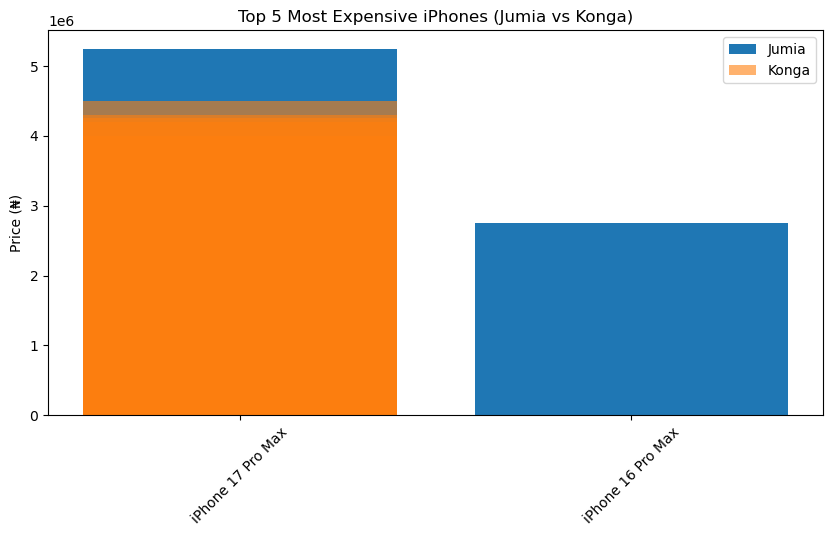

In [5]:
# Select top 5 most expensive iPhones from each dataset
top5_jumia = jumia.nlargest(5, 'Phone_Price')[['Series', 'Phone_Price']]
top5_konga = konga.nlargest(5, 'Phone_Price')[['Series', 'Phone_Price']]

plt.figure(figsize=(10,5))  # Set figure size for readability

# Plot bar charts for Jumia and Konga prices
plt.bar(top5_jumia['Series'], top5_jumia['Phone_Price'], label='Jumia')
plt.bar(top5_konga['Series'], top5_konga['Phone_Price'], alpha=0.6, label='Konga')

plt.title("Top 5 Most Expensive iPhones (Jumia vs Konga)")  # Add title
plt.ylabel("Price (₦)")                                     # Label y-axis
plt.xticks(rotation=45)                                     # Rotate x-axis labels for readability
plt.legend()                                                # Show legend
plt.show()                                                  # Display the plot

### 3. Plot Average iPhone Price Trend Across Series

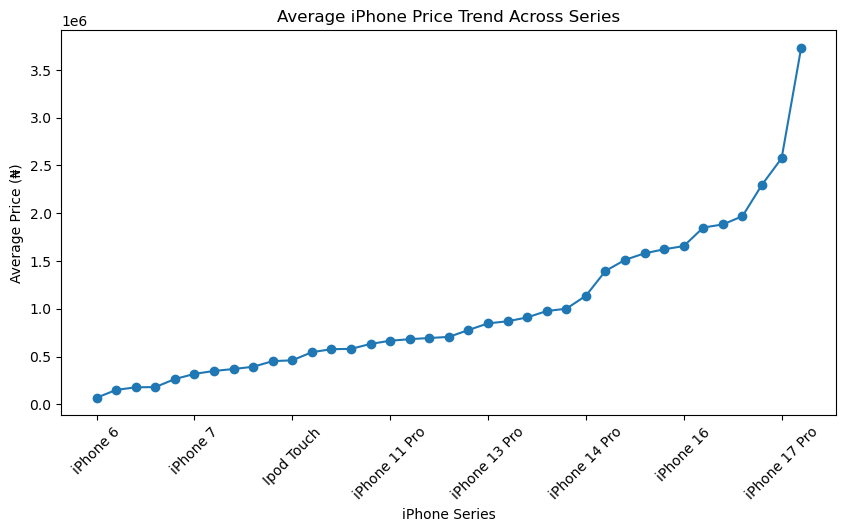

In [8]:
# Average iPhone Prices by Series for Jumia and Konga
avg_prices = pd.DataFrame({
    'Jumia': jumia.groupby('Series')['Phone_Price'].mean(),
    'Konga': konga.groupby('Series')['Phone_Price'].mean()
})

# Calculate the row-wise mean (average price across platforms)
avg_sorted = avg_prices.mean(axis=1).sort_values()

# Plot the average price trend as a line chart
avg_sorted.plot(kind='line', marker='o', figsize=(10,5))

plt.title("Average iPhone Price Trend Across Series")  # Add title
plt.ylabel("Average Price (₦)")                       # Label y-axis
plt.xlabel("iPhone Series")                            # Label x-axis
plt.xticks(rotation=45)                                # Rotate x-axis labels for readability
plt.show()                                             # Display the plot

### 4. Visualize Price Correlation Between Jumia and Konga

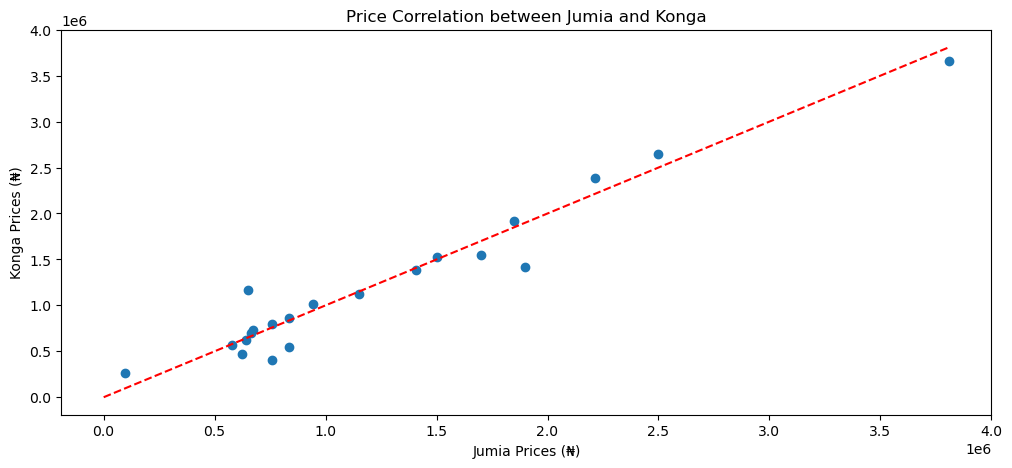

In [9]:
# Merge average iPhone prices by Series from both platforms
merged = pd.merge(
    jumia[['Series', 'Phone_Price']].groupby('Series').mean().reset_index(),
    konga[['Series', 'Phone_Price']].groupby('Series').mean().reset_index(),
    on='Series', suffixes=('_Jumia', '_Konga')
)

plt.figure(figsize=(12,5))  # Set figure size

# Scatter plot of Jumia vs Konga average prices
plt.scatter(merged['Phone_Price_Jumia'], merged['Phone_Price_Konga'])

# Add a reference line (y=x) to show perfect price correlation
plt.plot([0, merged[['Phone_Price_Jumia', 'Phone_Price_Konga']].values.max()], 
         [0, merged[['Phone_Price_Jumia', 'Phone_Price_Konga']].values.max()], 
         color='red', linestyle='--')

plt.title("Price Correlation between Jumia and Konga")  # Add title
plt.xlabel("Jumia Prices (₦)")                         # Label x-axis
plt.ylabel("Konga Prices (₦)")                         # Label y-axis
plt.show()                                             # Display the plot

### Analyze and Visualize Price Correlation via Heatmap

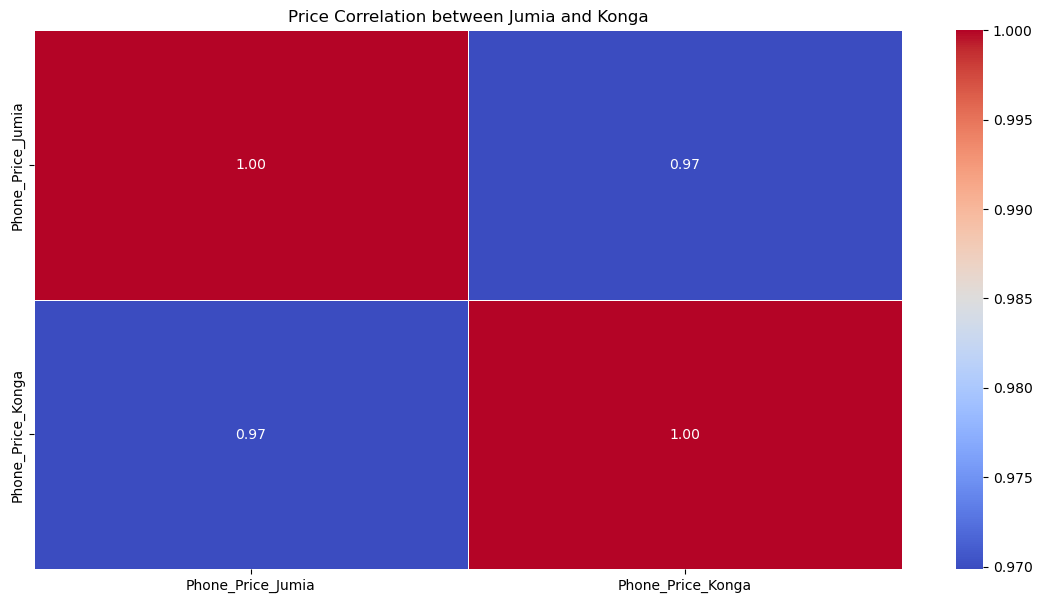

In [7]:
# Merge average iPhone prices from both platforms by Series
merged = pd.merge(
    jumia.groupby('Series')['Phone_Price'].mean().reset_index(),
    konga.groupby('Series')['Phone_Price'].mean().reset_index(),
    on='Series',
    suffixes=('_Jumia', '_Konga')
)

# Compute correlation matrix between Jumia and Konga prices
corr_matrix = merged[['Phone_Price_Jumia', 'Phone_Price_Konga']].corr()

# Plot heatmap to visualize correlation
plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Price Correlation between Jumia and Konga")  # Add title
plt.show()                                              # Display the heatmap